## Logistic regression and stochastic gradient descent algorithms
We will learn how to programme the logistic regression (LR) model. To find the best fitting parameters in the LR, gradient descent (GD) and stochastic gradient descent (SGD) can be used.

In [1]:
# These modules are required for this exercise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

### 1. We start from a toy data. The following is to generate a data for demonstrating the logistic regression model for binary classification. We will use the gradient descent algorithm and the stochastic gradient descent algorithm to optimize the model parameters.

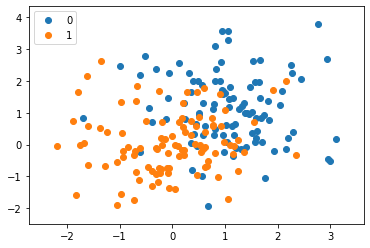

In [2]:
# class 1
s1 = pd.DataFrame(np.random.randn(100,2))
y1 = np.int32(np.ones(100))

# class 2
s2 = pd.DataFrame(np.random.randn(100,2)+ 1.0) 
y2 = np.int32(0.0*np.ones(100))
subdata=pd.concat([s1, s2],axis=0, ignore_index=True)
subdata.columns = ['x1','x2']
y = pd.Series(np.concatenate([y1,y2]))
subdata['class'] = pd.Series(y)
#pd.set_option('display.max_rows', None)

groups = subdata.groupby('class')
# scatter plots
fig, ax = plt.subplots()
ax.margins(0.1)
for name, group in groups:    
    ax.plot(group.x1,group.x2,marker='o',linestyle='',label=name)
ax.legend()

### 1.1) Our task is to train a LR classifier using the following data, where X is the feature data and Y the corresponding class labels. Note that since we are going to use gradient descent algorithm, I'd like to use TensorFlow to represent all the variables.

In [3]:
X = tf.constant(subdata.values[:,0:2], dtype=tf.float32)
Y = tf.constant(subdata.values[:,-1], shape=(len(subdata.index),1), dtype=tf.float32)
print(X)
print(Y)

tf.Tensor(
[[-8.3374316e-01 -6.9991909e-02]
 [-1.0520098e+00 -1.8914987e+00]
 [-2.7113709e-01 -1.1666617e+00]
 [-1.4252678e-01  1.8156119e-01]
 [-1.3617146e+00  2.6344380e+00]
 [-9.7553766e-01  1.3452640e+00]
 [-7.3450732e-01 -3.1673849e-01]
 [-9.5570940e-01  3.7122363e-01]
 [-4.6312493e-01 -7.1167141e-01]
 [-2.9418975e-01 -1.3867071e-01]
 [ 1.0493460e+00 -1.6973065e+00]
 [ 6.2102526e-01  3.8903040e-01]
 [-1.2678131e+00 -6.7286116e-01]
 [ 4.7831693e-01 -9.5664865e-01]
 [ 1.3705140e+00 -2.2274755e-01]
 [ 2.7233869e-01  1.6458228e+00]
 [-2.1884055e-01 -7.7753544e-01]
 [ 8.0568731e-01 -2.4790186e-01]
 [ 8.6549205e-01 -1.0075409e+00]
 [ 3.5992196e-01  2.9612592e-01]
 [-6.7782885e-01  1.8259647e+00]
 [ 1.8446957e-01 -1.7497602e-01]
 [ 6.7055249e-01 -5.0511789e-01]
 [-3.7923756e-01 -1.2896245e+00]
 [ 5.5745218e-02 -1.8752940e-02]
 [-2.5978217e-01  1.6824461e+00]
 [-6.0534392e-02 -1.3675555e+00]
 [-7.1413720e-01 -1.8532652e-01]
 [ 6.0129893e-01  1.7702413e+00]
 [ 5.3554911e-02 -1.4023339e+00]

### 1.2) Firstly, we want to compute the log odds of class 1 (or the logit function). Write a function to accomplish this small task.

In [4]:
def logits(X,w):   
    # put your code here to compute the log odds
    return tf.matmul(X,w) # log P1(x;w)/P0(x;w) = wx

### 1.3) Secondly, we want to compute the negative sigmoid cross entropy. Again write a function to accomplish it.

In [5]:
def loss(X,Y,w):
    # put your code here to compute the negative sigmoid cross entropy. 
    # you can use tensorflow's sigmoid_cross_entropy_with_logits method
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits(X,w)))

### 1.4) Thirdly, since the objective function, i.e., the loss function, has been defined, the gradient is now needed for using gradient descent algorithm.
### So we can use TensorFlow's GradientTape to automatically compute the gradients
### In the following, write a function to returen the gradient given the variable w.

In [6]:
# you can compute the gradient using this function by using the loss function you have previously defined 
def w_grad(w,X,Y):
    with tf.GradientTape() as tape:
        tape.watch(w)
        loss_fun = loss(X,Y,w)
        print(loss_fun)
        print("loss = ", loss_fun)
    return tape.gradient(loss_fun,w)

# test it
w = tf.Variable(initial_value=[[1.0],[1.0]],shape=(2,1), dtype=tf.float32)
grad = w_grad(w,X,Y)
print(grad)

tf.Tensor(1.6383829, shape=(), dtype=float32)
loss =  tf.Tensor(1.6383829, shape=(), dtype=float32)
tf.Tensor(
[[0.58258075]
 [0.60943156]], shape=(2, 1), dtype=float32)


### 1.5) Finally, the parameter w can be learning using gradient descent, given an initial value for w, the gradient, and the data.

tf.Tensor(2.912771, shape=(), dtype=float32)
loss =  tf.Tensor(2.912771, shape=(), dtype=float32)
Loss =  tf.Tensor(2.8688788, shape=(), dtype=float32)
tf.Tensor(2.8688788, shape=(), dtype=float32)
loss =  tf.Tensor(2.8688788, shape=(), dtype=float32)
Loss =  tf.Tensor(2.8251255, shape=(), dtype=float32)
tf.Tensor(2.8251255, shape=(), dtype=float32)
loss =  tf.Tensor(2.8251255, shape=(), dtype=float32)
Loss =  tf.Tensor(2.781516, shape=(), dtype=float32)
tf.Tensor(2.781516, shape=(), dtype=float32)
loss =  tf.Tensor(2.781516, shape=(), dtype=float32)
Loss =  tf.Tensor(2.7380567, shape=(), dtype=float32)
tf.Tensor(2.7380567, shape=(), dtype=float32)
loss =  tf.Tensor(2.7380567, shape=(), dtype=float32)
Loss =  tf.Tensor(2.6947534, shape=(), dtype=float32)
tf.Tensor(2.6947534, shape=(), dtype=float32)
loss =  tf.Tensor(2.6947534, shape=(), dtype=float32)
Loss =  tf.Tensor(2.6516123, shape=(), dtype=float32)
tf.Tensor(2.6516123, shape=(), dtype=float32)
loss =  tf.Tensor(2.6516123, shape=

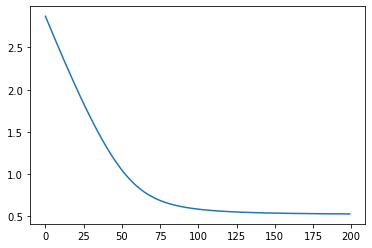

In [7]:
# use gradient descent to update w
Iters = 200
eta = 0.05
Loss = []
# define w to be a variable
w = tf.Variable(initial_value=[[2.0],[2.0]],shape=(2,1), dtype=tf.float32)
Weights = tf.identity(w) # to store the w at each iteration
for i in range(Iters):
    # put your code hear to update w and save the computed loss at each step
    grad = w_grad(w,X,Y)
    w.assign_sub(eta*grad)
    Weights = tf.concat([Weights,tf.identity(w)],axis=1)
    Loss.append(loss(X,Y,w))
    # print("w = ", w)
    print("Loss = ", Loss[i])
#print(Weights)
plt.plot(Loss)

### 1.6) We have done gradient descent algorithm. Now we want to use SGD to learn w instead.
### Firstly, we need to write a function to automatically create mini-batches to feed data to SGD

In [8]:
# to create mini-batches
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    #data = np.hstack((X, y)) 
    data = np.transpose(np.vstack((X_data,y_data)))
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

# test it
X_data = np.transpose(X.numpy())
y_data = np.transpose(Y.numpy())
mini_batches = create_mini_batches(X_data, y_data, 2)
print(mini_batches[0])

(array([[-0.98428017,  2.4823422 ],
       [-0.6172287 , -0.10470673]], dtype=float32), array([[0.],
       [1.]], dtype=float32))


### 1.7) Secondly, we now can programme the SGD to learn w by using mini-batch data.

tf.Tensor(0.3105115, shape=(), dtype=float32)
loss =  tf.Tensor(0.3105115, shape=(), dtype=float32)
Loss =  tf.Tensor(0.30967033, shape=(), dtype=float32)
tf.Tensor(5.102806, shape=(), dtype=float32)
loss =  tf.Tensor(5.102806, shape=(), dtype=float32)
Loss =  tf.Tensor(0.30967033, shape=(), dtype=float32)
tf.Tensor(1.6444114, shape=(), dtype=float32)
loss =  tf.Tensor(1.6444114, shape=(), dtype=float32)
Loss =  tf.Tensor(0.30967033, shape=(), dtype=float32)
tf.Tensor(1.6287744, shape=(), dtype=float32)
loss =  tf.Tensor(1.6287744, shape=(), dtype=float32)
Loss =  tf.Tensor(0.30967033, shape=(), dtype=float32)
tf.Tensor(2.9182925, shape=(), dtype=float32)
loss =  tf.Tensor(2.9182925, shape=(), dtype=float32)
Loss =  tf.Tensor(0.30967033, shape=(), dtype=float32)
tf.Tensor(3.8426461, shape=(), dtype=float32)
loss =  tf.Tensor(3.8426461, shape=(), dtype=float32)
Loss =  tf.Tensor(0.30967033, shape=(), dtype=float32)
tf.Tensor(3.7170997, shape=(), dtype=float32)
loss =  tf.Tensor(3.717099

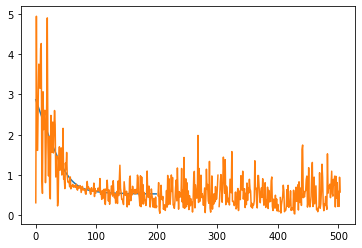

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.81497455],
       [-0.5794897 ]], dtype=float32)>


In [9]:
# Stochastic gradient descent
# use stochastic gradient descent to update w
Iters = 5
eta = 0.05
Loss_mini = []
w = tf.Variable(initial_value=[[2.0],[2.0]],shape=(2,1), dtype=tf.float32)
Weights = tf.identity(w)
for i in range(Iters):
    # write your code here to use SGD to update w and store the loss values at each step
    mini_batches = create_mini_batches(X_data, y_data, 2)
    for mini_batch in mini_batches:
        X_mini = mini_batch[0]
        Y_mini = mini_batch[1]
        grad = w_grad(w,X_mini,Y_mini)
        w.assign_sub(eta*grad)
        Weights = tf.concat([Weights,tf.identity(w)],axis=1)
        Loss_mini.append(loss(X_mini,Y_mini,w))
        # print("w = ", w)
        print("Loss = ", Loss_mini[i])

# test it
plt.plot(Loss)
plt.plot(Loss_mini)
plt.show()
print(w)

## Prediction
### The trained model can be used for prediction

### 2.1) Generate a test data

In [10]:
# generate test data
# class 1
s1 = pd.DataFrame(np.random.randn(100,2))
y1 = np.int32(np.ones(100))

# class 2
s2 = pd.DataFrame(np.random.randn(100,2)+ 1.0) 
y2 = np.int32(0.0*np.ones(100))
test_X=pd.concat([s1, s2],axis=0, ignore_index=True)
test_X.columns = ['x1','x2']
test_Y = pd.Series(np.concatenate([y1,y2]))
#subdata['class'] = pd.Series(test_Y)
test_X = tf.constant(test_X.values, dtype=tf.float32)
#print(test_X)
test_Y = tf.constant(test_Y.values, dtype=tf.float32)
print(test_Y)

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], shape=(200,), dtype=float32)


### 2.2) Define the sigmoid function

In [11]:
def sigmoid(X,w):
    # put your code here to compute the sigmoid function values for prediction
    return tf.nn.sigmoid(logits(X,w))

### 2.3) Compute the predicted labels for the test data

In [12]:
print(test_Y)

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], shape=(200,), dtype=float32)


In [13]:
# put your code here to find the predicted lables for test data
pred = sigmoid(test_X,w)
print(pred)

tf.Tensor(
[[0.8184765 ]
 [0.2777729 ]
 [0.21059588]
 [0.29941303]
 [0.47355515]
 [0.3772149 ]
 [0.7550473 ]
 [0.40342656]
 [0.5527533 ]
 [0.5711453 ]
 [0.2645324 ]
 [0.8356148 ]
 [0.12264913]
 [0.9188945 ]
 [0.6159286 ]
 [0.79970396]
 [0.5990309 ]
 [0.46252334]
 [0.531835  ]
 [0.83542514]
 [0.5855183 ]
 [0.0991115 ]
 [0.6831848 ]
 [0.43275556]
 [0.42518812]
 [0.3781191 ]
 [0.6889237 ]
 [0.33279538]
 [0.7313044 ]
 [0.6196778 ]
 [0.25443092]
 [0.53120995]
 [0.9166881 ]
 [0.7237499 ]
 [0.43042105]
 [0.45887968]
 [0.644325  ]
 [0.69447196]
 [0.17123312]
 [0.3694061 ]
 [0.54722905]
 [0.16236484]
 [0.66112745]
 [0.5137198 ]
 [0.14063472]
 [0.68848264]
 [0.6013036 ]
 [0.21794647]
 [0.7355963 ]
 [0.7719426 ]
 [0.1610974 ]
 [0.2936256 ]
 [0.4665883 ]
 [0.6482779 ]
 [0.81971747]
 [0.824381  ]
 [0.4395919 ]
 [0.7235911 ]
 [0.4345368 ]
 [0.8477028 ]
 [0.7388565 ]
 [0.30085772]
 [0.66646403]
 [0.4562165 ]
 [0.11984012]
 [0.61218435]
 [0.37513143]
 [0.6750321 ]
 [0.6614021 ]
 [0.7127043 ]
 [0.51613

### 2.4) Compute the confusion matrix

In [17]:
# put your code here to compute confusion matrix
pred = tf.cast(pred>0.5,tf.float32)
print(pred)

tf.Tensor(
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

### 2.5) Draw the ROC curve

In [19]:
# put your code here to compute fpr and tpr for drawing the ROC curve
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(test_Y, pred)
print(fpr)

[0.   0.03 1.  ]


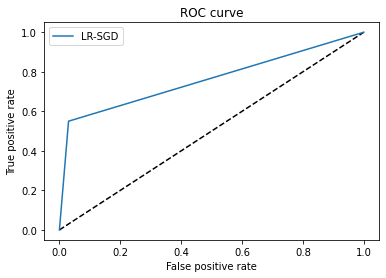

In [23]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LR-SGD')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()